In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
admission_df = pd.read_csv(r'C:\Users\Om Computers\Desktop\Decision Tree + Random Forest + Ensemble Techniques\admission.csv',
                             header=0,index_col=0)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


Q1. Perform Exploratory Data Analysis (EDA) tasks 

a) Visualize the 10 random rows of the data set

In [3]:
admission_df.sample(n=10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
494,300,95,2,3.0,1.5,8.22,1,0.62
85,340,115,5,4.5,4.5,9.45,1,0.94
299,330,114,3,4.5,4.5,9.24,1,0.90
19,318,110,3,4.0,3.0,8.80,0,0.63
75,314,106,3,3.0,5.0,8.90,0,0.74
314,301,100,3,3.5,3.0,8.04,0,0.67
61,309,100,2,3.0,3.0,8.10,0,0.48
410,300,98,1,2.0,2.5,8.02,0,0.61
198,310,106,2,3.5,2.5,8.33,0,0.73


b) Generate the description for numeric variables

In [4]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
admission_df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

c) Check the shape of the data set

In [6]:
admission_df.shape

(500, 8)

d) Generate the correlation matrix

In [7]:
corr_df = admission_df.corr(method='pearson')
print(corr_df)

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827200           0.635376  0.613498   
TOEFL Score         0.827200     1.000000           0.649799  0.644410   
University Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524679     0.541563           0.608651  0.663707   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance of Admit     0.810351     0.792228           0.690132  0.684137   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.524679  0.825878  0.563398          0.810351  
TOEFL Score        0.541563  0.810574  0.467012          0.792228  
University Rating  0.608651  0.705254  0.427047          0.690132  
SOP                0.663707  0.712154  0.408116          0.68

<AxesSubplot:>

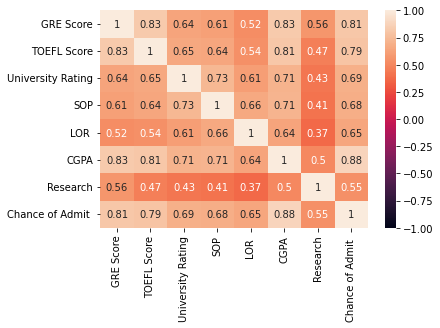

In [8]:
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

e) Generate a correlogram

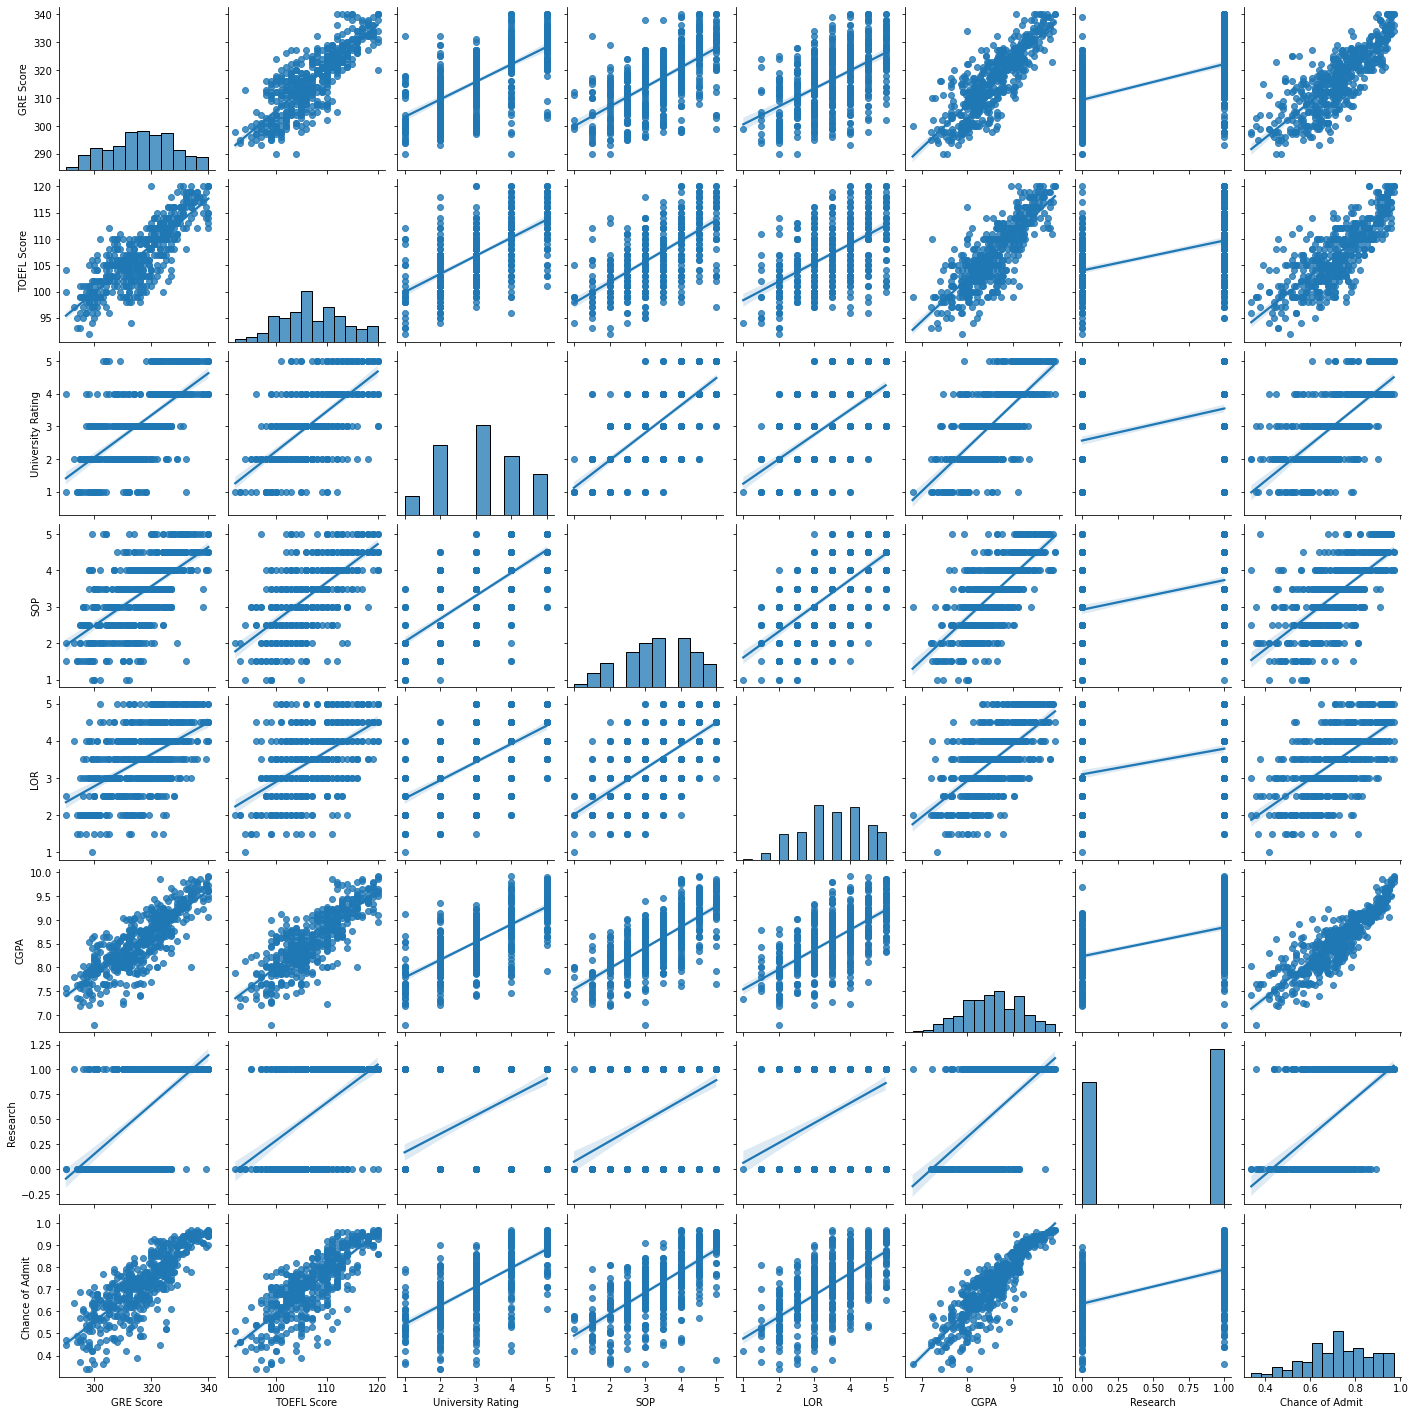

In [9]:
sns.pairplot(admission_df,kind="reg")
plt.show()

Q.2 Find out the minimum and maximum values for GRE score

In [10]:
print('THE Minimum value for GRE Score=',admission_df['GRE Score'].min())

THE Minimum value for GRE Score= 290


In [11]:
print('THE Maximum value for GRE Score = ',admission_df['GRE Score'].max())

THE Maximum value for GRE Score =  340


Q.3 Find out the percentage of universities for each university rating

In [12]:
count = admission_df['University Rating'].value_counts()
percent = admission_df['University Rating'].value_counts(normalize=True)
percent_100 = admission_df['University Rating'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
x = pd.DataFrame({'counts': count, 'per': percent, 'per100': percent_100})
sorted_x=x.sort_index()
sorted_x

,counts,per,per100
1,34,0.068,6.8%
2,126,0.252,25.2%
3,162,0.324,32.4%
4,105,0.210,21.0%
5,73,0.146,14.6%


Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1

In [13]:
admission_df['Admit']=np.where(admission_df['Chance of Admit '] > 0.8,1,0)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,1
2,324,107,4,4.0,4.5,8.87,1,0.76,0
3,316,104,3,3.0,3.5,8.00,1,0.72,0
4,322,110,3,3.5,2.5,8.67,1,0.80,0
5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [14]:
admission_df.drop('Chance of Admit ',axis=1,inplace=True)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,1
2,324,107,4,4.0,4.5,8.87,1,0
3,316,104,3,3.0,3.5,8.00,1,0
4,322,110,3,3.5,2.5,8.67,1,0
5,314,103,2,2.0,3.0,8.21,0,0


In [15]:
#Creating X and Y
X = admission_df.values[:,0:-1]
Y = admission_df.values[:,-1]

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [17]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

In [18]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[62  7]
 [ 6 25]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91        69
         1.0       0.78      0.81      0.79        31

    accuracy                           0.87       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.87      0.87      0.87       100

Accuracy of the model:  0.87


In [20]:
model_DecisionTree.score(X_train,Y_train)

1.0

In [21]:
print(list(zip(admission_df.columns[0:-1],model_DecisionTree.feature_importances_)))

[('GRE Score', 0.0606787087836416), ('TOEFL Score', 0.04808641486842179), ('University Rating', 0.023443960956682303), ('SOP', 0.016744376605968305), ('LOR ', 0.04275216000749721), ('CGPA', 0.7860717006203553), ('Research', 0.02222267815743356)]


In [22]:
from sklearn import tree
with open(r"model_DecisionTree.txt", "w") as f:
    
    f = tree.export_graphviz(model_DecisionTree, feature_names=admission_df.columns[0:-1],
                             out_file=f)
    
#generate the file and upload the code in webgraphviz.com to plot the decision tree

In [23]:
#predicting using the Decision Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10,
                                          splitter="best",min_samples_leaf=5,max_depth=10,max_leaf_nodes=200)


#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[66  3]
 [ 9 22]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        69
         1.0       0.88      0.71      0.79        31

    accuracy                           0.88       100
   macro avg       0.88      0.83      0.85       100
weighted avg       0.88      0.88      0.88       100

Accuracy of the model:  0.88


# Using criterion=entropy

In [25]:
#predicting using the Decision Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="entropy",random_state=10)
                                         


#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[65  4]
 [ 5 26]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94        69
         1.0       0.87      0.84      0.85        31

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.91      0.91      0.91       100

Accuracy of the model:  0.91


From the above observations we can see that the base model was giving an prediction model of 87% whereas the tuned model using criterion=entropy gave us prediction model of 91%.
As the Type II error in base model was 6 whereas in tuned model it was decreasing i.e 5
the student who were having the chance was admission were misclassified as having less chance  for admission, as compared to that of the tuned model. 
Therefore we can say that tuned model is working good in Decision Tree.

Q.6	Build a Random Forest classifier, to predict whether a student has a low or high chance of admission to a chosen university.

In [27]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators=50,random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred = model_RandomForest.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[69  0]
 [ 6 25]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        69
         1.0       1.00      0.81      0.89        31

    accuracy                           0.94       100
   macro avg       0.96      0.90      0.93       100
weighted avg       0.94      0.94      0.94       100

Accuracy of the model:  0.94


Q.7	Also use Ensemble Modelling techniques, to predict whether a student has a low or high chance of admission to a chosen university.

# Using Extra_Trees_Classifier

In [29]:
#predicting using the Extra_Tress_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_EXT=ExtraTreesClassifier(n_estimators=200,random_state=10)


#fit the model on the data and predict the values
model_EXT.fit(X_train,Y_train)

Y_pred=model_EXT.predict(X_test)

#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[68  1]
 [ 3 28]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        69
         1.0       0.97      0.90      0.93        31

    accuracy                           0.96       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.96      0.96      0.96       100

Accuracy of the model:  0.96


# Using AdaBoost_Classifier

In [31]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),n_estimators=100,random_state=10)


#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)

Y_pred=model_AdaBoost.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[64  5]
 [ 5 26]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        69
         1.0       0.84      0.84      0.84        31

    accuracy                           0.90       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100

Accuracy of the model:  0.9


# Using Gradient Boosting Classifier

In [33]:
#predicting using the Gradient_Boosting_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting= GradientBoostingClassifier(random_state=10,n_estimators=300)


#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[66  3]
 [ 6 25]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        69
         1.0       0.89      0.81      0.85        31

    accuracy                           0.91       100
   macro avg       0.90      0.88      0.89       100
weighted avg       0.91      0.91      0.91       100

Accuracy of the model:  0.91


# Using XGBoost

In [35]:
#predicting using the Gradient_Boosting_Classifier
from xgboost import XGBClassifier

model_GradientBoosting=XGBClassifier(random_state=10,n_estimators=100)


#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

[09:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[67  2]
 [ 7 24]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        69
         1.0       0.92      0.77      0.84        31

    accuracy                           0.91       100
   macro avg       0.91      0.87      0.89       100
weighted avg       0.91      0.91      0.91       100

Accuracy of the model:  0.91


Q.8	Compare all of the models and justify your choice about the optimum model.

From all the above models Extra Trees Classifier has a good model prediction overall than other models.
As it showed less TypeII error and the accuracy score is also good i.e 96%